Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction_ID      5000 non-null   object 
 1   User_ID             5000 non-null   object 
 2   Transaction_Amount  5000 non-null   float64
 3   Transaction_Type    5000 non-null   object 
 4   Transaction_Time    5000 non-null   object 
 5   Location            5000 non-null   object 
 6   Fraudulent          5000 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 273.6+ KB
None

First Five Rows:
  Transaction_ID User_ID  Transaction_Amount Transaction_Type  \
0         T00001   U0103              132.41           Online   
1         T00002   U0436               25.97           Online   
2         T00003   U0861              118.28              POS   
3         T00004   U0271               19.39           Online   
4         T00005   U0107   

C:\Users\AMIT\AppData\Local\Temp\ipykernel_11072\1928586687.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Fraudulent', data=data, palette="coolwarm")


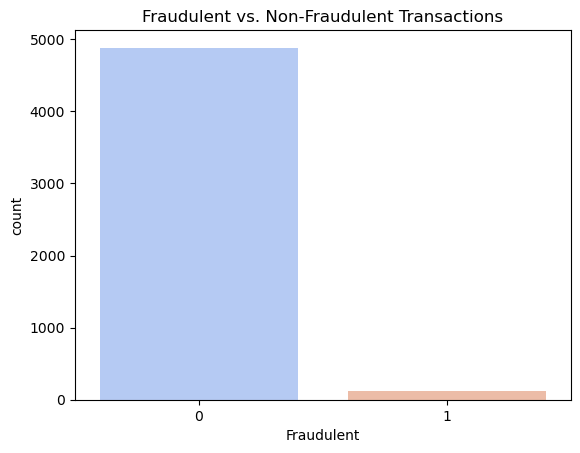

C:\Users\AMIT\AppData\Local\Temp\ipykernel_11072\1928586687.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fraudulent', y='Transaction_Amount', data=data, palette="coolwarm")


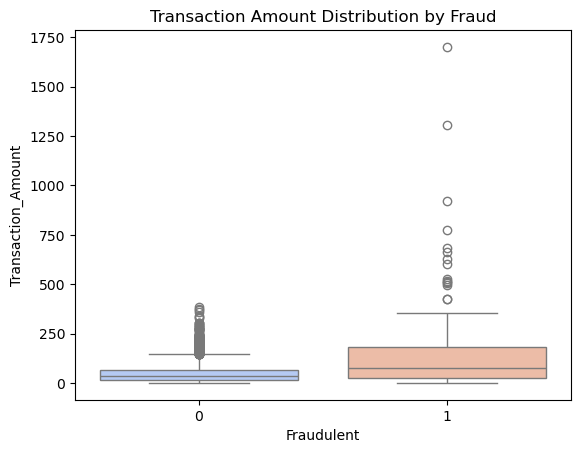


Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.66      0.67       977
           1       0.67      0.70      0.69       976

    accuracy                           0.68      1953
   macro avg       0.68      0.68      0.68      1953
weighted avg       0.68      0.68      0.68      1953


Confusion Matrix:
[[641 336]
 [288 688]]

Feature Importances:
                   Feature  Importance
0       Transaction_Amount    0.888860
2  Transaction_Type_Online    0.045785
5           Location_Urban    0.021907
4        Location_Suburban    0.018803
3     Transaction_Type_POS    0.016183
1  Transaction_Type_Mobile    0.008462


C:\Users\AMIT\AppData\Local\Temp\ipykernel_11072\1928586687.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette="viridis")


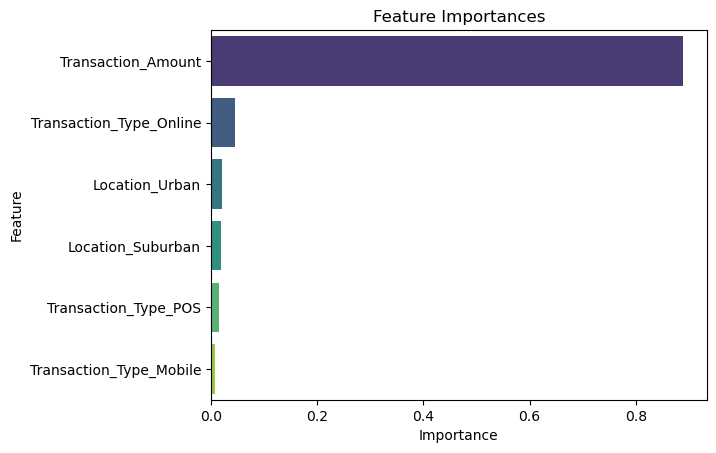

In [49]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE

# Load the Dataset
data = pd.read_csv("C:/Users/AMIT/Desktop/Synthetic_Fraud_Detection_Dataset.csv")

# Display Basic Info
print("Dataset Info:")
print(data.info())
print("\nFirst Five Rows:")
print(data.head())

# Check for Missing Values
print("\nMissing Values:")
print(data.isnull().sum())

# --- Step 1: Exploratory Data Analysis (EDA) ---
# Class Distribution
fraud_distribution = data['Fraudulent'].value_counts(normalize=True)
print("\nFraud Class Distribution:")
print(fraud_distribution)

# Visualize Fraudulent Transactions
sns.countplot(x='Fraudulent', data=data, palette="coolwarm")
plt.title("Fraudulent vs. Non-Fraudulent Transactions")
plt.show()

# Boxplot of Transaction Amount by Fraudulent
sns.boxplot(x='Fraudulent', y='Transaction_Amount', data=data, palette="coolwarm")
plt.title("Transaction Amount Distribution by Fraud")
plt.show()

# --- Step 2: Data Preprocessing ---
# Drop Irrelevant Columns
data = data.drop(['Transaction_ID', 'Transaction_Time', 'User_ID'], axis=1)

# Encode Categorical Variables
data = pd.get_dummies(data, columns=['Transaction_Type', 'Location'], drop_first=True)

# Scale Numerical Features
scaler = StandardScaler()
data['Transaction_Amount'] = scaler.fit_transform(data[['Transaction_Amount']])

# Separate Features and Target Variable
X = data.drop('Fraudulent', axis=1)
y = data['Fraudulent']

# Handle Class Imbalance Using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# --- Step 3: Model Training ---
# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# --- Step 4: Model Evaluation ---
# Predict on Test Set
y_pred = model.predict(X_test)

# Evaluate Model Performance
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature Importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)

# Plot Feature Importances
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette="viridis")
plt.title("Feature Importances")
plt.show()
